In [35]:
import pandas as pd
import numpy as np

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Getting Data

In [36]:
data = pd.read_csv('tracks.csv')
data

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3AJwUDP919kvQ9QcozQPxg,Yellow,89,['Coldplay'],2000-07-10,266773,0.00239,0.429,0.661,0.000121,11.0,0.2340,-7.227,1.0,0.0281,173.372,4.0,0.2850
1,60a0Rd6pjrkxjPbaKzXjfq,In the End,87,['Linkin Park'],2000,216880,0.00958,0.556,0.864,0.000000,3.0,0.2090,-5.870,0.0,0.0584,105.143,4.0,0.4000
2,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,86,['Eminem'],2000-05-23,284200,0.03020,0.949,0.661,0.000000,5.0,0.0454,-4.244,0.0,0.0572,104.504,4.0,0.7600
3,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,83,['Outkast'],2000-10-31,270506,0.14300,0.843,0.806,0.000000,4.0,0.0771,-5.946,0.0,0.2690,94.948,4.0,0.6130
4,7D0RhFcb3CrfPuTJ0obrod,Sparks,84,['Coldplay'],2000-07-10,227093,0.74800,0.371,0.268,0.051700,1.0,0.1040,-10.506,1.0,0.0281,102.617,3.0,0.1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23uUytja1B1mUOOIoygf6u,Angels in Tibet,71,['Amaarae'],2023-06-09,142613,0.28200,0.798,0.664,0.294000,5.0,0.1350,-6.043,0.0,0.1020,140.038,4.0,0.5550
23996,40gtc8CqWgi9KXY6tbxI8z,Pink Noise to Help Focus,66,['Xella Machina'],2023-03-05,202750,0.80200,0.206,0.203,0.999000,1.0,0.1120,-36.132,1.0,0.0990,62.138,4.0,0.0749
23997,17IBDpAl3J39swaoPlfGpp,Another Late Night (feat. Lil Yachty),65,"['Drake', 'Lil Yachty']",2023-10-06,170414,0.01440,0.702,0.710,0.000000,5.0,0.1440,-5.003,0.0,0.0459,158.129,4.0,0.2820
23998,6rbJkjLFKy3UFYwODuA8pl,Stormy Night Reflections: Rain Soundscape,67,['24H Rain Sounds'],2023-06-09,155671,0.17600,0.151,0.935,0.749000,2.0,0.4610,-20.234,0.0,0.0700,92.507,4.0,0.0131


## Cleaning Data

### 1. Remove duplicate tracks

In [37]:
data[data['id'].duplicated()]

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
11400,0S0O5SDpY3DSAz4cLED6Ay,Olvídame,63,['Julión Álvarez y su Norteño Banda'],2011-11-15,243133,0.6,0.761,0.402,0.000004,3.0,0.0602,-5.85,1.0,0.0331,129.975,3.0,0.961


In [38]:
duplicate_count = len(data[data['id'].duplicated()])
print(f'Successfully removed {duplicate_count} duplicate tracks.')

data = data.drop_duplicates()

Successfully removed 1 duplicate tracks.


### 2. Remove tracks with no audio features

In [39]:
data[data.isna().any(axis=1)] # NaN = no audio features

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
6506,5gfPJ45gpn3ThswDyeW0Qc,Last Night (feat. Keyshia Cole),62,"['Diddy', 'Keyshia Cole']",2006-10-16,388226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7357,3fJ1I1XNSSs7BcLkOxSCUp,Praise Him In Advance,55,['Marvin Sapp'],2007-07-03,325973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,1sfSQ2d6rTsCSQ2cbBIj8r,Your Grace Is Enough,48,['Matt Maher'],2008-04-08,265386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8877,7uGoOSK4Cxs37aBGN61ZZe,2nd Theme 2,44,['Misha Segal'],2008-09-25,30480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15216,7s7q9dpsSCMEnDR3WhExZy,Clouds as Witnesses,66,['$uicideboy$'],2015-03-03,153808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22898,5SJZH9cW2v3SrF3Pher2oP,White Noise Shade 4,63,['Octobas'],2022-02-08,123702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22911,13esgv6hjAXqOBvncP0sQx,Feathery White Noise,64,['The Clear Mind'],2022-08-14,173720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22935,1pKDDWvQp4HiyEzsVuSHTT,Cloud White Noise,64,['Lilly Almberg'],2022-03-29,136736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22962,37EoUoGfIfSEprR0UboDNp,White Noise Sleeping Pill,64,['Atmosphere of Calm'],2022-08-07,254907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
no_audio_feature_count = len(data[data.isna().any(axis=1)])
print(f'Successfully removed {no_audio_feature_count} tracks with no audio features.')

data = data.dropna()

Successfully removed 76 tracks with no audio features.


### 3. Remove tracks with 0 BPM

In [41]:
data[data['tempo'] == 0.0]

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1410,4QpYKPdZI5xJQGB4W4yLsO,A New Mia - Score,56,['John Debney'],2001-01-01,65720,0.93300,0.0,0.020000,0.947000,0.0,0.1050,-31.524,1.0,0.0,0.0,0.0,0.0
3283,6MoY9dj27qBHzCCmcvYTIJ,"5 Pieces, Op. 75, ""The Trees"": No. 3 Aspen",59,"['Jean Sibelius', 'Håvard Gimse']",2003-06-11,140333,0.99500,0.0,0.001830,0.905000,8.0,0.0794,-35.278,0.0,0.0,0.0,0.0,0.0
4301,4gkEzBl4X0lZVLGGqVjyNS,La Lámpara,59,['Chelo'],2004-02-20,159928,0.50300,0.0,0.185000,0.000000,10.0,0.0602,-11.037,1.0,0.0,0.0,0.0,0.0
4304,1Kb2DqjHRvOcT5xeWtz3t5,Ferme Les Yeux,61,['Sylvain Chauveau'],2004-04-15,68493,0.99400,0.0,0.032300,0.973000,2.0,0.0922,-23.636,0.0,0.0,0.0,0.0,0.0
4811,4U91psdbA7T4pBJnZ9LUTg,Rosalie est partie,49,['Philippe Sarde'],2004,57000,0.92600,0.0,0.013400,0.950000,10.0,0.0992,-31.532,1.0,0.0,0.0,0.0,0.0
8460,3oKBZhpwrMiOhosXauv3lP,Ocean Waves,52,['Crain & Taylor'],2008-10-01,598424,0.93100,0.0,0.000075,0.892000,1.0,0.1150,-19.703,0.0,0.0,0.0,0.0,0.0
8483,6DGy22vuYNxREpXSNajx2l,Gregory Gives Mig Away,58,['William Ross'],2008-12-16,62453,0.97600,0.0,0.005130,0.965000,8.0,0.0725,-38.284,1.0,0.0,0.0,0.0,0.0
9130,6CeajvxcjyZ46cGbrKwq9n,Souvenir d'Italie,67,['Lelio Luttazzi'],2009-01-01,72413,0.68600,0.0,0.439000,0.950000,7.0,0.3070,-13.484,1.0,0.0,0.0,0.0,0.0
9586,035fB4qKVUc0GOW0oJcKMF,Clean White Noise,50,['White Noise Therapy'],2009-08-06,422510,0.72800,0.0,0.016300,0.326000,1.0,0.1110,-24.419,1.0,0.0,0.0,0.0,0.0
12448,7dTyZl4cBRKnPBeq1fdrHY,White Noise,58,['Rain Sounds'],2012-05-07,240000,0.11900,0.0,0.601000,0.771000,4.0,0.9680,-13.753,0.0,0.0,0.0,0.0,0.0


In [42]:
zero_bpm_count = len(data[data['tempo'] == 0.0])
print(f'Successfully removed {zero_bpm_count} tracks with 0 bpm.')

data = data[data['tempo'] != 0.0]

Successfully removed 21 tracks with 0 bpm.


### 4. Remove tracks with invalid time signature

In [43]:
# according to spotify's developer website, 'time_signature' ranges from 3 to 7

data[data['time_signature'] < 3]

,id,name,popularity,artists,release_date,duration,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
421,0DaZU7iKgXMelfXCkCOgBK,Steve Berman,50,"['Eminem', 'Steve Berman']",2000-05-23,53573,0.578000,0.663,0.62600,0.000000,1.0,0.4690,-10.536,1.0,0.6390,148.087,1.0,0.83700
476,6Xan47ZLZr9P8YEcOt3JaX,"5 Preludes, Op. 16: IV. Prelude No. 4 in E-Fla...",53,"['Alexander Scriabin', 'Evgeny Zarafiants']",2000-02-09,61933,0.993000,0.405,0.00150,0.950000,3.0,0.0696,-41.899,0.0,0.0489,78.540,1.0,0.36100
772,7si7S7r2BQUfJIMhN2lJDO,"3 Pieces, Op. 2: Prelude in B Major, Op. 2, No. 2",49,"['Alexander Scriabin', 'Evgeny Zarafiants']",2000-02-09,59093,0.994000,0.310,0.00555,0.964000,11.0,0.0984,-41.150,1.0,0.0514,130.591,1.0,0.18100
856,7t2ix5iyt6UPwKkaXbgL8s,Mi Gusto Es,43,['La Arrolladora Banda El Limón De Rene Camacho'],2000-06-13,153093,0.701000,0.636,0.38200,0.000384,3.0,0.1050,-11.969,1.0,0.0370,105.704,1.0,0.97300
859,5b3mIPS9eqmMfuoOr7JNkp,Goddamn Electric,45,['Pantera'],2000-01-01,296773,0.000515,0.378,0.94700,0.006090,6.0,0.0331,-2.300,0.0,0.1340,128.195,1.0,0.34800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22870,0KNJrBUU6A93gsBlPo9F7Q,Tunnel Noise,63,['Ecstatix'],2022-01-10,178000,0.789000,0.145,0.29500,0.964000,1.0,0.1120,-36.638,1.0,0.0901,138.506,1.0,0.04950
22921,6h1s7cKnUtsbRpE5bwnUTf,dying on the inside,67,['Nessa Barrett'],2022-02-25,204847,0.000527,0.539,0.58700,0.000000,0.0,0.1710,-4.603,0.0,0.0371,124.849,1.0,0.42900
22952,2KYlude6dyEfbJsMlV1SmL,Heavy Rain and Thunder for Sleeping,61,['Pure Sleeping Vibes'],2022-09-11,450280,0.000043,0.142,0.98000,0.767000,6.0,0.3360,-18.378,1.0,0.0946,139.083,1.0,0.00824
23022,3rUGC1vUpkDG9CZFHMur1t,greedy,90,['Tate McRae'],2023-09-15,131872,0.261000,0.749,0.72900,0.000000,6.0,0.1130,-3.190,0.0,0.0321,111.004,1.0,0.81600


In [44]:
invalid_time_signature_count = len(data[data['time_signature'] < 3])
print(f'Successfully removed {invalid_time_signature_count} tracks with invalid time signature.')

data = data[data['time_signature'] >= 3]

Successfully removed 187 tracks with invalid time signature.


### 5. Remove unused columns of data

In [45]:
# we are only focused on the popularity and audio features of each track
data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'duration', 'mode'])

data

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,89,0.00239,0.429,0.661,0.000121,11.0,0.2340,-7.227,0.0281,173.372,4.0,0.2850
1,87,0.00958,0.556,0.864,0.000000,3.0,0.2090,-5.870,0.0584,105.143,4.0,0.4000
2,86,0.03020,0.949,0.661,0.000000,5.0,0.0454,-4.244,0.0572,104.504,4.0,0.7600
3,83,0.14300,0.843,0.806,0.000000,4.0,0.0771,-5.946,0.2690,94.948,4.0,0.6130
4,84,0.74800,0.371,0.268,0.051700,1.0,0.1040,-10.506,0.0281,102.617,3.0,0.1650
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,71,0.28200,0.798,0.664,0.294000,5.0,0.1350,-6.043,0.1020,140.038,4.0,0.5550
23996,66,0.80200,0.206,0.203,0.999000,1.0,0.1120,-36.132,0.0990,62.138,4.0,0.0749
23997,65,0.01440,0.702,0.710,0.000000,5.0,0.1440,-5.003,0.0459,158.129,4.0,0.2820
23998,67,0.17600,0.151,0.935,0.749000,2.0,0.4610,-20.234,0.0700,92.507,4.0,0.0131


In [46]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,23715.0,60.743496,9.580799,38.000000,53.0000,61.000000,67.00000,93.000
acousticness,23715.0,0.252885,0.284105,0.000001,0.0207,0.130000,0.41700,0.996
danceability,23715.0,0.608642,0.169531,0.054200,0.5010,0.621000,0.73300,0.988
energy,23715.0,0.648674,0.214429,0.000020,0.5160,0.674000,0.81600,1.000
instrumentalness,23715.0,0.067767,0.211523,0.000000,0.0000,0.000003,0.00078,1.000
key,23715.0,5.269703,3.572730,0.000000,2.0000,5.000000,8.00000,11.000
liveness,23715.0,0.187303,0.150883,0.012300,0.0957,0.125000,0.23800,0.993
loudness,23715.0,-7.193932,4.356957,-45.386000,-8.3125,-6.222000,-4.71400,1.334
speechiness,23715.0,0.094693,0.099091,0.022300,0.0359,0.051400,0.10400,0.948
tempo,23715.0,122.137422,30.155842,40.262000,97.3965,120.073000,141.98050,220.099


## Analyze Data

### (Statistics) Which feature has the biggest linear relationship with popularity?

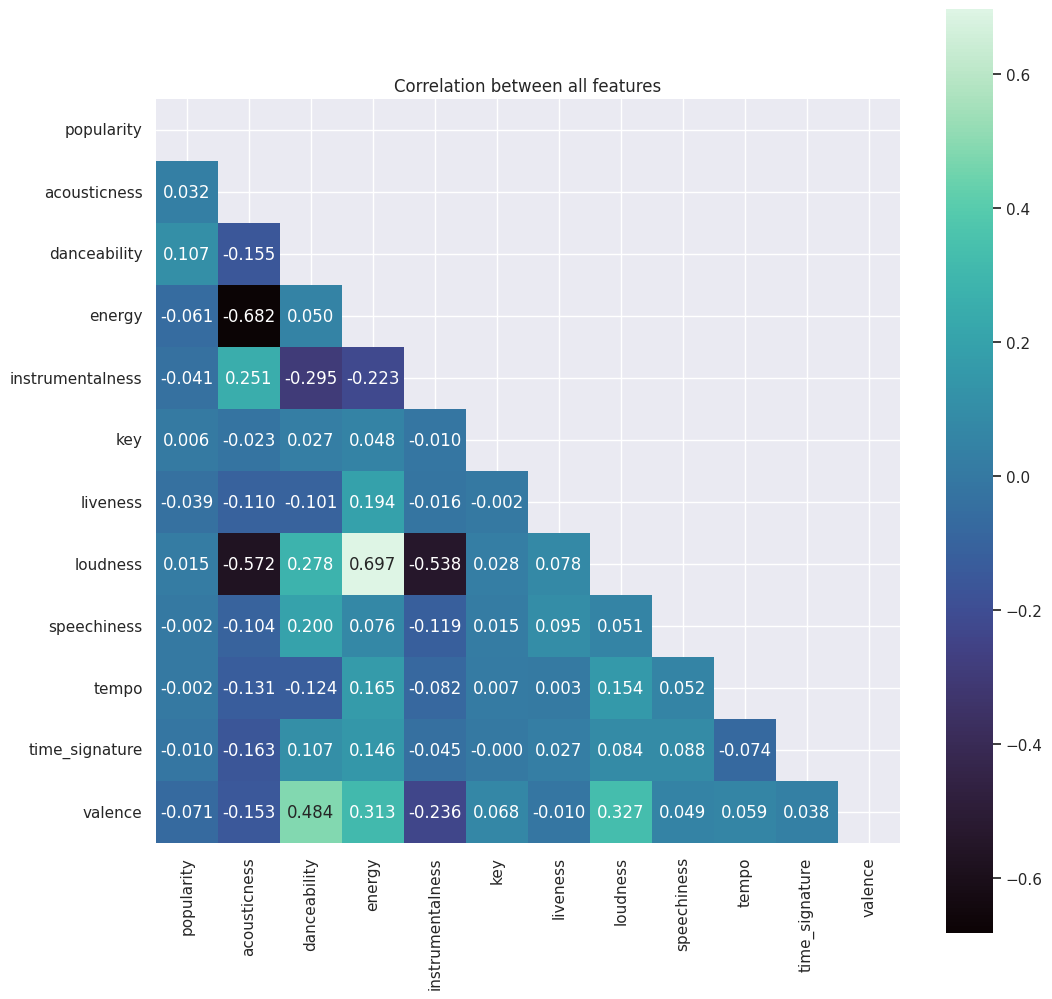

In [47]:
# create a mask for the upper diagonal
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, cmap='mako', mask=mask, fmt= '.3f', square=True)
plt.title('Correlation between all features')
plt.show()

#### We are only interested in the correlation between each feature and popularity:

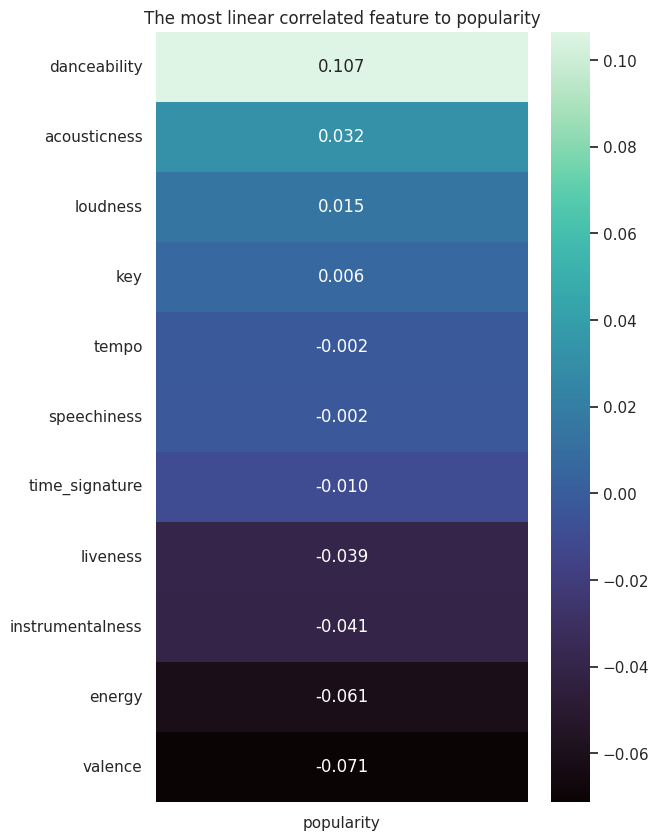

In [48]:
corr = data.corr()[['popularity']].drop('popularity', axis=0).sort_values(by='popularity', ascending=False)

fig, ax = plt.subplots(figsize=(6, 10))
sns.heatmap(corr, annot=True, cmap='mako', fmt= '.3f')
plt.title('The most linear correlated feature to popularity')
plt.show()

#### Danceability seems to be mostly correlated with popularity...

In [49]:
fit = stats.linregress(data['danceability'], data['popularity'])
fit.slope, fit.intercept

(6.021639288054452, 57.07847150622203)

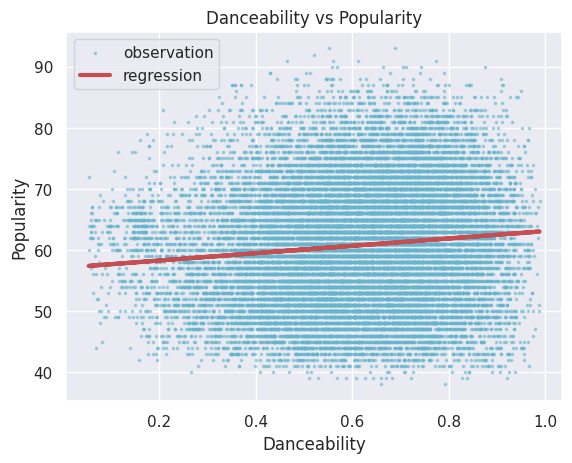

In [50]:
fit_line = data['danceability'] * fit.slope + fit.intercept

plt.scatter(data['danceability'], data['popularity'], s=2.5, c='c', alpha=0.5)
plt.plot(data['danceability'], fit_line, 'r-', linewidth=3)
plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend(['observation', 'regression'])
plt.show()

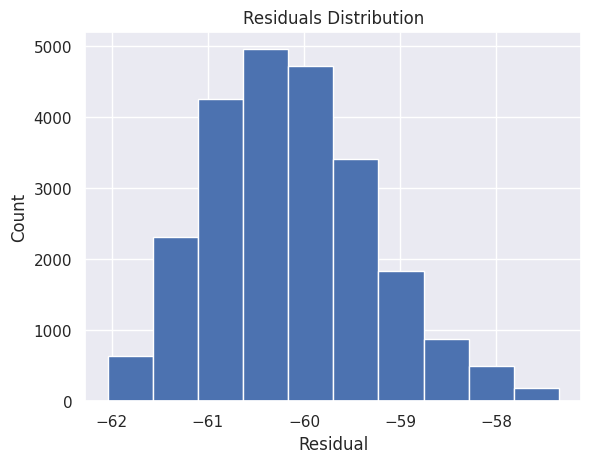

In [51]:
# make sure the residuals are normally distributed (as assumed by OLS test)
residuals = data['danceability'] - fit_line

plt.hist(residuals)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.show()

#### The distribution seems to be normal, and by central limit theorem, we could assume normality.

In [52]:
fit.pvalue

7.767069548576773e-61

#### Since p-value < 0.05, the slope of the fit line is not zero, or there is a linear relationship between danceability and popularity.

### (Machine Learning) Which feature has the most importance on predicting popularity?

#### We could train models and predict popularity by various features, then look at the best model's feature importances and identify one feature with highest importance on predicting popularity:

In [53]:
# separate features and split into validation and training dataset

X = data.drop('popularity', axis=1)
y = data['popularity']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

#### (Regression)

In [54]:
# decision tree regressor

dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=500)
dt_reg.fit(X_train, y_train)

dt_reg_train = dt_reg.score(X_train, y_train)
dt_reg_valid = dt_reg.score(X_valid, y_valid)

print(f'score by training dataset: {dt_reg_train:.5f}')
print(f'score by validation dataset: {dt_reg_valid:.5f}')

score by training dataset: 0.06563
score by validation dataset: 0.03724


In [55]:
# random forest regressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=500)
rf_reg.fit(X_train, y_train)

rf_reg_train = rf_reg.score(X_train, y_train)
rf_reg_valid = rf_reg.score(X_valid, y_valid)

print(f'score by training dataset: {rf_reg_train:.5f}')
print(f'score by validation dataset: {rf_reg_valid:.5f}')

score by training dataset: 0.10963
score by validation dataset: 0.07286


In [56]:
# gradient boosting regressor

gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=400)
gb_reg.fit(X_train, y_train)

gb_reg_train = gb_reg.score(X_train, y_train)
gb_reg_valid = gb_reg.score(X_valid, y_valid)

print(f'score by training dataset: {gb_reg_train:.5f}')
print(f'score by validation dataset: {gb_reg_valid:.5f}')

score by training dataset: 0.17203
score by validation dataset: 0.08489


In [57]:
# adaboost regressor

ab_reg = AdaBoostRegressor(n_estimators=400)
ab_reg.fit(X_train, y_train)

ab_reg_train = ab_reg.score(X_train, y_train)
ab_reg_valid = ab_reg.score(X_valid, y_valid)

print(f'score by training dataset: {ab_reg_train:.5f}')
print(f'score by validation dataset: {ab_reg_valid:.5f}')

score by training dataset: 0.04484
score by validation dataset: 0.04306


#### all regression models have a bad performance when popularity is numerical...

#### (Classification) - categorize popularity into ['low', 'medium', 'high']

In [58]:
data['popularity'].describe()

count    23715.000000
mean        60.743496
std          9.580799
min         38.000000
25%         53.000000
50%         61.000000
75%         67.000000
max         93.000000
Name: popularity, dtype: float64

In [59]:
# source: https://stackoverflow.com/questions/37724225/how-to-categorize-floating-values-in-python-using-pandas-library

bins = [0, 55, 65, 100]
labels = ['low', 'medium', 'high']

data['popularity_class'] = pd.cut(data['popularity'], bins=bins, labels=labels)
print(data['popularity_class'].value_counts()) # make sure data is categorized evenly

popularity_class
medium    8727
low       7581
high      7407
Name: count, dtype: int64


In [60]:
# we predict the popularity class (categorical) instead of popularity (numerical)

X = data.drop(columns=['popularity', 'popularity_class'])
y = data['popularity_class']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [61]:
# decision tree classifier

dt_class = DecisionTreeClassifier(max_depth=5, min_samples_split=400)
dt_class.fit(X_train, y_train)

dt_class_train = dt_class.score(X_train, y_train)
dt_class_valid = dt_class.score(X_valid, y_valid)

print(f'score by training dataset: {dt_class_train:.5f}')
print(f'score by validation dataset: {dt_class_valid:.5f}')

score by training dataset: 0.41465
score by validation dataset: 0.39265


In [62]:
# random forest classifier

rf_class = RandomForestClassifier(n_estimators=100, max_depth=7)
rf_class.fit(X_train, y_train)

rf_class_train = rf_class.score(X_train, y_train)
rf_class_valid = rf_class.score(X_valid, y_valid)

print(f'score by training dataset: {rf_class_train:.5f}')
print(f'score by validation dataset: {rf_class_valid:.5f}')

score by training dataset: 0.50467
score by validation dataset: 0.41373


In [63]:
# gradient boosting classifier

gb_class = GradientBoostingClassifier(n_estimators=100, max_depth=7, min_samples_split=400)
gb_class.fit(X_train, y_train)

gb_class_train = gb_class.score(X_train, y_train)
gb_class_valid = gb_class.score(X_valid, y_valid)

print(f'score by training dataset: {gb_class_train:.5f}')
print(f'score by validation dataset: {gb_class_valid:.5f}')

score by training dataset: 0.59271
score by validation dataset: 0.41980


In [64]:
# adaboost classifier

ab_class = AdaBoostClassifier(n_estimators=400, algorithm='SAMME')
ab_class.fit(X_train, y_train)

ab_class_train = ab_class.score(X_train, y_train)
ab_class_valid = ab_class.score(X_valid, y_valid)

print(f'score by training dataset: {ab_class_train:.5f}')
print(f'score by validation dataset: {ab_class_valid:.5f}')

score by training dataset: 0.40554
score by validation dataset: 0.39130


#### classifier models surprisingly perform much better than regressors!

#### Find the best model and identify the most important feature

In [65]:
# 'model name': (model, validation_score)
models = {
    'Decision Tree Classifier': (dt_class, dt_class_valid),
    'Random Forest Classifier': (rf_class, rf_class_valid),
    'Gradient Boosting Classifier': (gb_class, gb_class_valid),
    'AdaBoost Classifier': (ab_class, ab_class_valid)
}

# select the best model
best_model_name = max(models, key=lambda k: models[k][1])
best_model, best_model_score = models[best_model_name]
print(f'The best model is \'{best_model_name}\' with validation score {best_model_score:.5f}.')

The best model is 'Gradient Boosting Classifier' with validation score 0.41980.


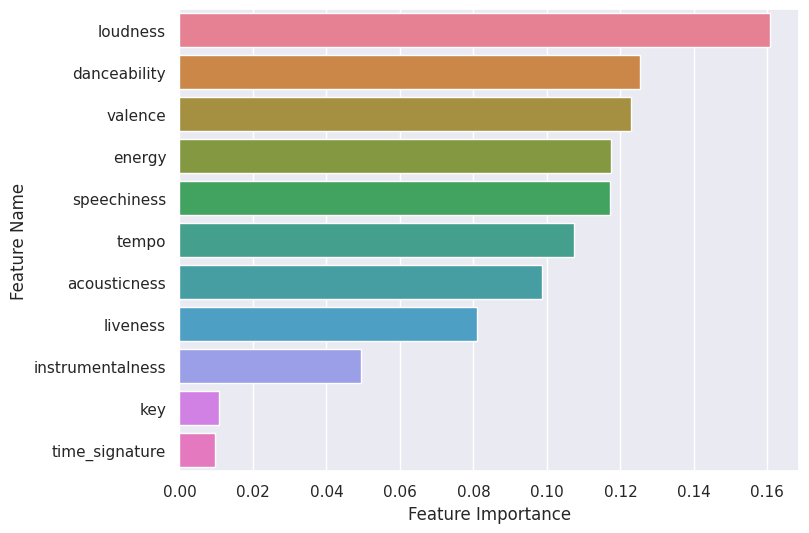

In [66]:
feature_importance = best_model.feature_importances_
df = pd.DataFrame({'Feature Name': X.columns, 'Feature Importance': feature_importance})
df = df.sort_values(by='Feature Importance', ascending=False)

# generate color palette
colors = sns.color_palette("viridis", len(df))

plt.figure(figsize=(8,6))
sns.barplot(df, x='Feature Importance', y='Feature Name', hue=colors, legend=False)
plt.show()

#### Loudness has the most significant impact on the track popularity.